In [1]:
from plotly.offline import init_notebook_mode, iplot


ImportError: No module named 'plotly'

In [2]:
!pip install plotly

     |████████████████████████████████| 7.1MB 771kB/s eta 0:00:01     |██████▉                         | 1.5MB 1.6MB/s eta 0:00:04     |█████████▋                      | 2.1MB 1.6MB/s eta 0:00:04     |███████████▋                    | 2.6MB 1.8MB/s eta 0:00:03     |██████████████▊                 | 3.2MB 1.8MB/s eta 0:00:03     |███████████████▌                | 3.4MB 1.8MB/s eta 0:00:03     |████████████████████████▍       | 5.4MB 3.1MB/s eta 0:00:01     |█████████████████████████████▊  | 6.6MB 771kB/s eta 0:00:01     |██████████████████████████████▋ | 6.7MB 771kB/s eta 0:00:01
  Stored in directory: /Users/hasegawatakashikana/Library/Caches/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
!pip install wordcloud

     |████████████████████████████████| 163kB 945kB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
!pip install --upgrade pip

     |████████████████████████████████| 1.4MB 1.3MB/s eta 0:00:01
  Found existing installation: pip 19.1.1
    Uninstalling pip-19.1.1:
      Successfully uninstalled pip-19.1.1


In [21]:
from plotly.offline import init_notebook_mode, iplot
from wordcloud import WordCloud
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import chart_studio.plotly as py
from plotly import tools
from datetime import date
import pandas as pd
import numpy as np 
import seaborn as sns
import random 
import warnings
warnings.filterwarnings("ignore")
#connectedをTrueにすると、PlotlyのJavascriptをインターネットから取得するようになります。
init_notebook_mode(connected=True)

In [6]:
!pip install chart-studio

     |████████████████████████████████| 81kB 1.5MB/s eta 0:00:01


In [95]:
def bar_hor(df, col, title, color, w=None, h=None, lm=0, limit=100, return_trace=False, rev=False, xlb = False):
    """
    横向き棒グラフ作成関数
    df:  表示するデータ
    col: 表示する列名
    title: タイトル
    color: 色
    w=None:　横の長さ 
    h=None: 　たての長さ
    lm=0: レイアウト？
    limit=100: unique値が多すぎた時に何個表示するか
    return_trace=False: この関数のReturnが表か数値かを示す（数値なら他のとこで使う）
    rev=False: limitで取ってくる個数を最初の方から取るか最後からとるか
    xlb = False: 各バーの説明
    """
    cnt_srs = df[col].value_counts()
    yy = cnt_srs.head(limit).index[::-1] 
    print(yy)
    xx = cnt_srs.head(limit).values[::-1] 
    if rev:
        yy = cnt_srs.tail(limit).index[::-1] 
        xx = cnt_srs.tail(limit).values[::-1] 
    if xlb:
        trace = go.Bar(y=xlb, x=xx, orientation = 'h', marker=dict(color=color))
    else:
        trace = go.Bar(y=yy, x=xx, orientation = 'h', marker=dict(color=color))
    if return_trace:
        return trace 
    layout = dict(title=title, margin=dict(l=lm), width=w, height=h)
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

In [92]:
cnt_srs = app_train["TARGET"].value_counts()
print(cnt_srs.tail(100).index)
print(cnt_srs.head(100).index)

Int64Index([0, 1], dtype='int64')
Int64Index([0, 1], dtype='int64')


In [88]:
def bar_hor_noagg(x, y, title, color, w=None, h=None, lm=0, limit=100, rt=False):
    trace = go.Bar(y=x, x=y, orientation = 'h', marker=dict(color=color))
    if rt:
        return trace
    layout = dict(title=title, margin=dict(l=lm), width=w, height=h)
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)


def bar_ver_noagg(x, y, title, color, w=None, h=None, lm=0, rt = False):
    trace = go.Bar(y=y, x=x, marker=dict(color=color))
    if rt:
        return trace
    layout = dict(title=title, margin=dict(l=lm), width=w, height=h)
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)
    

In [103]:
def gp(df,col,y, title):
    """
    グループ化棒グラフを表示
    df:  使用するデータ
    col: 表示する列
    y : 目標値の列（今回は中身が1か0）
    title: 図のタイトル
    """
    df1 = df[df[y] == 1]
    df0 = df[df[y] == 0]
    a1 = df1[col].value_counts()
    b1 = df0[col].value_counts()

    trace1 = go.Bar(x=a1.index, y=a1.values, name='{} : 1'.format(y), marker=dict(color="#44ff54"))
    trace2 = go.Bar(x=b1.index, y=b1.values, name='{} : 0'.format(y), marker=dict(color="#ff4444"))

    data = [trace1, trace2]
    layout = go.Layout(barmode='group', height=300, title = title)

    fig = go.Figure(data=data, layout=layout)
    iplot(fig, filename='grouped-bar')


In [17]:
cd Downloads/home-credit-default-risk/

/Users/hasegawatakashikana/Downloads/home-credit-default-risk


In [18]:
app_train = pd.read_csv( "application_train.csv") # application train データの読み込み
app_train.head() # 最初の5行を表示

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
app_train.shape

(307511, 122)

In [96]:
# 目的変数の分布
# 横向き棒グラフの表示
bar_hor(app_train, # 表示するデータ 
        "TARGET", # 表示する列名
        "Distribution of Target Variable" , # 図のタイトル
        ["#44ff54", '#ff4444'], # 棒グラフの色
        h=400, # 図の高さ
        w=800, # 図の幅
        lm=100, # ?
        return_trace=False,
        xlb = ['Target : 1','Target : 0'] ,# 各バーの説明
        rev =False

       )

Int64Index([1, 0], dtype='int64')


In [64]:
tr1 = bar_hor(app_train, "CODE_GENDER", "Distribution of CODE_GENDER Variable" ,"#639af2", w=700, lm=100, return_trace= True) # 性別の棒グラフ
tr2 = bar_hor(app_train, "NAME_CONTRACT_TYPE", "Distribution of NAME_CONTRACT_TYPE Variable" ,"#a4c5f9", w=700, lm=100, return_trace = True) # 契約タイプの棒グラフ

# 図の整形・表示
fig = tools.make_subplots(rows=1, cols=2, print_grid=True, subplot_titles = ['Gender' , 'Contract Type'])
fig.append_trace(tr1, 1, 1);
fig.append_trace(tr2, 1, 2);
fig['layout'].update(height=400, showlegend=False, margin=dict(b=140));
iplot(fig);

This is the format of your plot grid:
[ (1,1) x,y   ]  [ (1,2) x2,y2 ]



In [102]:
# 性別・目的変数のグループ化棒グラフ
gp(app_train,'CODE_GENDER', # 表示する列名
   "TARGET",
   'Distribution of Target with Gender' # 図のタイトル
  ) 
gp(app_train,'NAME_CONTRACT_TYPE', "TARGET",'Distribution of Target with Contract Type') # 契約タイプ・目的変数のグループ化棒グラフ

In [28]:
tr1 = bar_hor(app_train, "FLAG_OWN_REALTY", "Distribution of FLAG_OWN_REALTY" ,"#639af2", w=700, lm=100, return_trace= True)
tr2 = bar_hor(app_train, "FLAG_OWN_CAR", "Distribution of FLAG_OWN_CAR" ,"#639af2", w=700, lm=100, return_trace = True)

fig = tools.make_subplots(rows=1, cols=2, print_grid=False, subplot_titles = ['Own Realty' , 'Own CAR'])
fig.append_trace(tr1, 1, 1);
fig.append_trace(tr2, 1, 2);
fig['layout'].update(height=400, showlegend=False, margin=dict(b=100));
iplot(fig);


gp('FLAG_OWN_REALTY', 'Distribution of Target with FLAG_OWN_REALTY')
gp('FLAG_OWN_CAR', 'Distribution of Target with FLAG_OWN_CAR Type')

In [29]:
tr1 = bar_hor(app_train, "NAME_TYPE_SUITE", "Distribution of NAME_TYPE_SUITE" ,"#639af2", w=700, lm=100, return_trace= True) # 世帯構成タイプの棒グラフ
tr2 = bar_hor(app_train, "NAME_INCOME_TYPE", "Distribution of NAME_INCOME_TYPE" ,"#a4c5f9", w=700, lm=100, return_trace = True) # 収入タイプの棒グラフ

fig = tools.make_subplots(rows=1, cols=2, print_grid=False, subplot_titles = ['Applicants Suite Type' , 'Applicants Income Type'])
fig.append_trace(tr1, 1, 1);
fig.append_trace(tr2, 1, 2);
fig['layout'].update(height=400, showlegend=False, margin=dict(l=100));
iplot(fig);

In [30]:
gp('NAME_TYPE_SUITE', 'Target with respect to Suite Type of Applicants')
gp('NAME_INCOME_TYPE', 'Target with respect to Income Type of Applicants')

In [31]:
tr1 = bar_hor(app_train, "NAME_FAMILY_STATUS", "Distribution of NAME_FAMILY_STATUS" ,"#639af2", w=700, lm=100, return_trace= True)
tr2 = bar_hor(app_train, "NAME_HOUSING_TYPE", "Distribution of NAME_HOUSING_TYPE" ,"#a4c5f9", w=700, lm=100, return_trace = True)

fig = tools.make_subplots(rows=1, cols=2, print_grid=False, subplot_titles = ['NAME_FAMILY_STATUS' , 'NAME_HOUSING_TYPE'])
fig.append_trace(tr1, 1, 1);
fig.append_trace(tr2, 1, 2);
fig['layout'].update(height=400, showlegend=False, margin=dict(l=100));
iplot(fig);

In [32]:
gp('NAME_FAMILY_STATUS', 'Target and Family Status')
gp('NAME_HOUSING_TYPE', 'Target and Housing Type')

In [33]:
tr1 = bar_hor(app_train, "NAME_EDUCATION_TYPE", "Distribution of NAME_EDUCATION_TYPE" ,"#639af2", w=700, lm=100, return_trace= True)
# tr2 = bar_hor(app_train, "NAME_INCOME_TYPE", "Distribution of NAME_FAMILY_STATUS" ,"#a4c5f9", w=700, lm=100, return_trace = True)

fig = tools.make_subplots(rows=1, cols=1, print_grid=False, subplot_titles = ['NAME_EDUCATION_TYPE' ])
fig.append_trace(tr1, 1, 1);
# fig.append_trace(tr2, 1, 2);
fig['layout'].update(height=400, showlegend=False, margin=dict(l=100));
iplot(fig);

In [34]:
gp('NAME_EDUCATION_TYPE', 'Education Type and Target')

In [35]:
tr1 = bar_hor(app_train, "ORGANIZATION_TYPE", "Distribution of ORGANIZATION_TYPE" ,"#639af2", w=700, lm=100, return_trace= True)
tr2 = bar_hor(app_train, "OCCUPATION_TYPE", "Distribution of OCCUPATION_TYPE" ,"#a4c5f9", w=700, lm=100, return_trace = True)

fig = tools.make_subplots(rows=1, cols=2, print_grid=False, subplot_titles = ['ORGANIZATION_TYPE' , 'OCCUPATION_TYPE'])
fig.append_trace(tr1, 1, 1);
fig.append_trace(tr2, 1, 2);
fig['layout'].update(height=600, showlegend=False, margin=dict(l=200));
iplot(fig);

In [36]:
gp('ORGANIZATION_TYPE', 'Organization Type and Target')
gp('OCCUPATION_TYPE', 'Occupation Type and Target')

In [37]:
tr1 = bar_hor(app_train, "WALLSMATERIAL_MODE", "Distribution of FLAG_OWN_CAR" ,"#a4c5f9", w=700, lm=100, return_trace = True)
tr2 = bar_hor(app_train, "FONDKAPREMONT_MODE", "Distribution of FLAG_OWN_REALTY" ,"#639af2", w=700, lm=100, return_trace= True)
tr3 = bar_hor(app_train, "HOUSETYPE_MODE", "Distribution of FLAG_OWN_CAR" ,"#a4c5f9", w=700, lm=100, return_trace = True)

fig = tools.make_subplots(rows=1, cols=3, print_grid=False, subplot_titles = ['WALLSMATERIAL_MODE' , 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE'])
fig.append_trace(tr1, 1, 1);
fig.append_trace(tr2, 1, 2);
fig.append_trace(tr3, 1, 3);

fig['layout'].update(height=400, showlegend=False, margin=dict(l=100));
iplot(fig);

In [38]:
gp('WALLSMATERIAL_MODE', 'Wall Material and Target')
gp('FONDKAPREMONT_MODE', 'Foundation and Target')
gp('HOUSETYPE_MODE', 'House Type and Target')

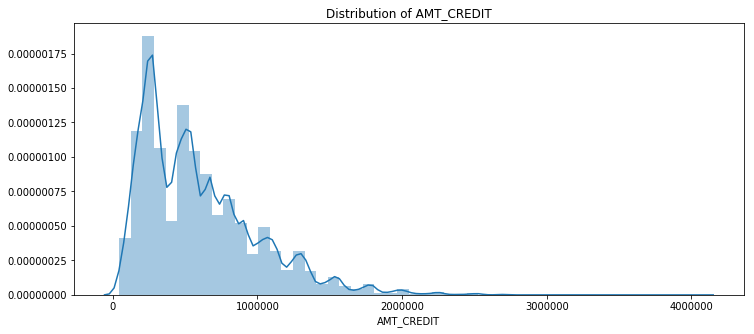

In [39]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_CREDIT")
ax = sns.distplot(app_train["AMT_CREDIT"])


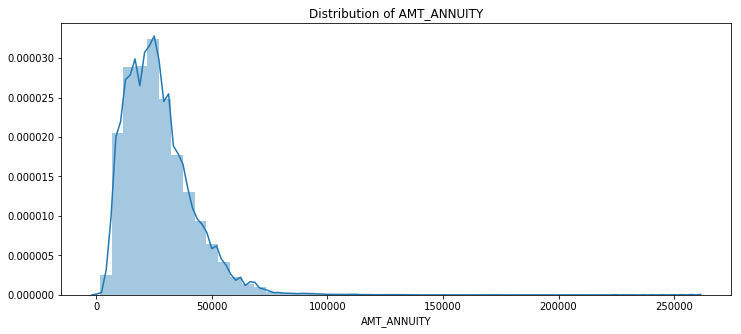

In [40]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_ANNUITY")
ax = sns.distplot(app_train["AMT_ANNUITY"].dropna())

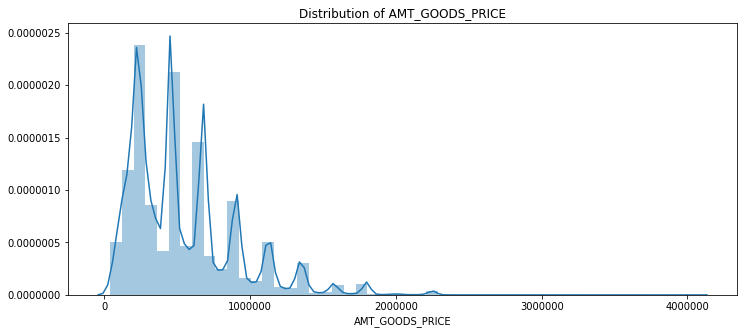

In [41]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_GOODS_PRICE")
ax = sns.distplot(app_train["AMT_GOODS_PRICE"].dropna())
# ax = sns.distplot(app_train["CNT_CHILDREN"], kde = False)

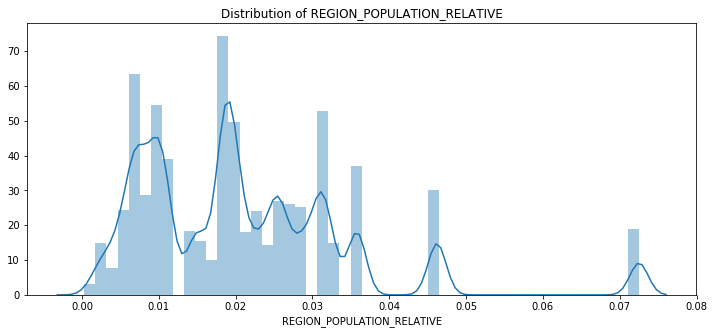

In [42]:
plt.figure(figsize=(12,5))
plt.title("Distribution of REGION_POPULATION_RELATIVE")
ax = sns.distplot(app_train["REGION_POPULATION_RELATIVE"])

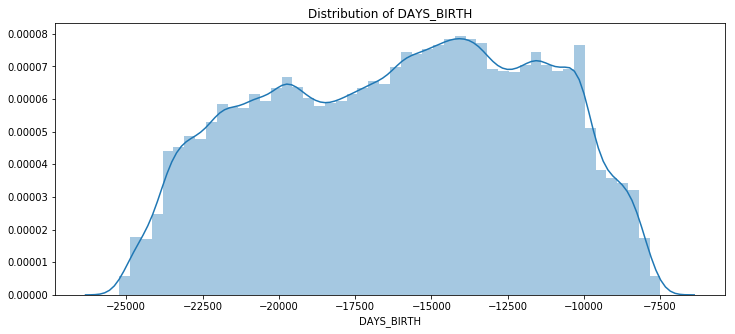

In [43]:
plt.figure(figsize=(12,5))
plt.title("Distribution of DAYS_BIRTH")
ax = sns.distplot(app_train["DAYS_BIRTH"])

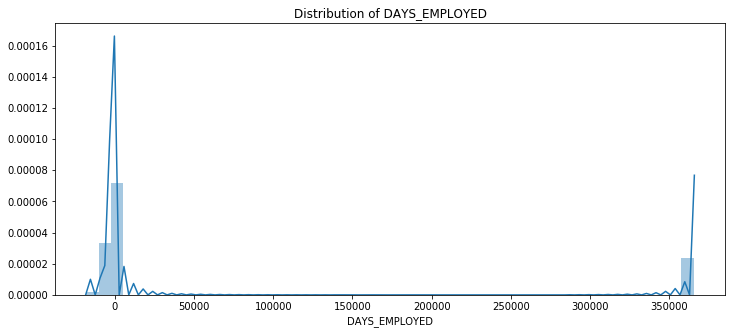

In [44]:
plt.figure(figsize=(12,5))
plt.title("Distribution of DAYS_EMPLOYED")
ax = sns.distplot(app_train["DAYS_EMPLOYED"])

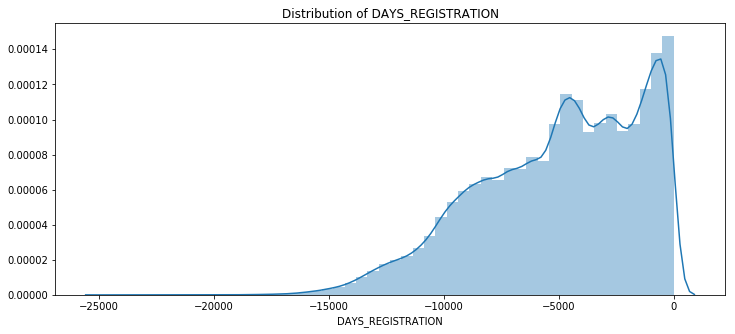

In [45]:
plt.figure(figsize=(12,5))
plt.title("Distribution of DAYS_REGISTRATION")
ax = sns.distplot(app_train["DAYS_REGISTRATION"])

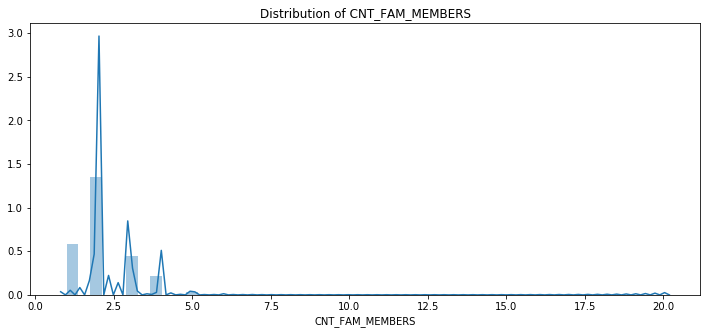

In [48]:
plt.figure(figsize=(12,5))
plt.title("Distribution of CNT_FAM_MEMBERS")
ax = sns.distplot(app_train["CNT_FAM_MEMBERS"].dropna())

In [49]:
bureau = pd.read_csv( "bureau.csv")
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [50]:
bureau_balance = pd.read_csv("bureau_balance.csv")
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [51]:
credit_card_balance = pd.read_csv( "credit_card_balance.csv")
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [52]:




























































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































test_X = app_test

# 前処理のためにトレインとテストを連結
data = pd.concat([train_X, test_X], axis=0)

In [54]:
train_X

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,is_test,is_train
0,100002,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,351000.0,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,1
1,100003,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,1129500.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
2,100004,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,135000.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
3,100006,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,297000.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,1
4,100007,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,513000.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
5,100008,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,454500.0,...,0,0,0.0,0.0,0.0,0.0,1.0,1.0,0,1
6,100009,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,1395000.0,...,0,0,0.0,0.0,0.0,1.0,1.0,2.0,0,1
7,100010,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,1530000.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
8,100011,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,913500.0,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,1
9,100012,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,405000.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,1


In [57]:
# カテゴリ変数を取得する関数
def _get_categorical_features(df):
    feats = [col for col in list(df.columns) if df[col].dtype == 'object']
    return feats

# カテゴリ変数をファクトライズ (整数に置換)する関数
def _factorize_categoricals(df, cats):
    for col in cats:
        df[col], _ = pd.factorize(df[col])
    return df 

# カテゴリ変数のダミー変数 (二値変数化)を作成する関数
def _get_dummies(df, cats):
    for col in cats:
        df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
    return df 

# カテゴリ変数を取得
data_cats = _get_categorical_features(data)
prev_app_cats = _get_categorical_features(previous_application)
bureau_cats = _get_categorical_features(bureau)

# ダミー変数を取得
previous_application = _get_dummies(previous_application, prev_app_cats)
bureau = _get_dummies(bureau, bureau_cats)

# カテゴリ変数をファクトライズ
data = _factorize_categoricals(data, data_cats)


In [110]:
previous_application = pd.read_csv( "previous_application.csv")

In [111]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
# IDごとに過去の申請回数をカウント
prev_apps_count = previous_application[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
print(prev_apps_count)
previous_application['SK_ID_PREV'] = previous_application['SK_ID_CURR'].map(prev_apps_count['SK_ID_PREV'])
print(previous_application['SK_ID_CURR'])

# IDごとに過去の申請書の特徴量の値の平均を取る
prev_apps_avg = previous_application.groupby('SK_ID_CURR').mean()
prev_apps_avg.columns = ['p_' + col for col in prev_apps_avg.columns]
data = data.merge(right=prev_apps_avg.reset_index(), how='left', on='SK_ID_CURR')

### 信用情報機関を現在の申請書情報と結びつける

# IDごとに信用情報機関の特徴量の値の平均を取る
bureau_avg = bureau.groupby('SK_ID_CURR').mean()
bureau_avg['buro_count'] = bureau[['SK_ID_BUREAU','SK_ID_CURR']].groupby('SK_ID_CURR').count()['SK_ID_BUREAU']
bureau_avg.columns = ['b_' + f_ for f_ in bureau_avg.columns]
data = data.merge(right=bureau_avg.reset_index(), how='left', on='SK_ID_CURR')

# 最終的なtrainとtestデータを用意
ignore_features = ['SK_ID_CURR', 'is_train', 'is_test']
relevant_features = [col for col in data.columns if col not in ignore_features]
trainX = data[data['is_train'] == 1][relevant_features]
testX = data[data['is_test'] == 1][relevant_features]

            SK_ID_PREV
SK_ID_CURR            
100001               1
100002               1
100003               3
100004               1
100005               2
100006               9
100007               6
100008               5
100009               7
100010               1
100011               4
100012               4
100013               4
100014               2
100015               1
100016               4
100017               2
100018               4
100019               1
100020               2
100021               6
100022               1
100023               4
100025               8
100026               3
100027               4
100028               5
100029               1
100030              12
100032               1
...                ...
456225               5
456226               1
456227               8
456228               9
456230               5
456231              14
456232               4
456233               2
456234               4
456235               5
456236     

In [114]:
previous_application.head(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,3,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,6,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,4,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,23,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,25,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,6,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,...,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,4,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,17,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,14,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,6,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
prev_apps_avg.head()

,p_SK_ID_PREV,p_AMT_ANNUITY,p_AMT_APPLICATION,p_AMT_CREDIT,p_AMT_DOWN_PAYMENT,p_AMT_GOODS_PRICE,p_HOUR_APPR_PROCESS_START,p_NFLAG_LAST_APPL_IN_DAY,p_RATE_DOWN_PAYMENT,p_RATE_INTEREST_PRIMARY,p_RATE_INTEREST_PRIVILEGED,p_DAYS_DECISION,p_SELLERPLACE_AREA,p_CNT_PAYMENT,p_DAYS_FIRST_DRAWING,p_DAYS_FIRST_DUE,p_DAYS_LAST_DUE_1ST_VERSION,p_DAYS_LAST_DUE,p_DAYS_TERMINATION,p_NFLAG_INSURED_ON_APPROVAL
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,
100001,1.0,3951.000,24835.50,23787.00,2520.0,24835.5,13.000000,1.0,0.104326,NaN,NaN,-1740.0,23.0,8.0,365243.0,-1709.000000,-1499.000000,-1619.000000,-1612.000000,0.000000
100002,1.0,9251.775,179055.00,179055.00,0.0,179055.0,9.000000,1.0,0.000000,NaN,NaN,-606.0,500.0,24.0,365243.0,-565.000000,125.000000,-25.000000,-17.000000,0.000000
100003,3.0,56553.990,435436.50,484191.00,3442.5,435436.5,14.666667,1.0,0.050030,NaN,NaN,-1305.0,533.0,10.0,365243.0,-1274.333333,-1004.333333,-1054.333333,-1047.333333,0.666667
100004,1.0,5357.250,24282.00,20106.00,4860.0,24282.0,5.000000,1.0,0.212008,NaN,NaN,-815.0,30.0,4.0,365243.0,-784.000000,-694.000000,-724.000000,-714.000000,0.000000
100005,2.0,4813.200,22308.75,20076.75,4464.0,44617.5,10.500000,1.0,0.108964,NaN,NaN,-536.0,18.0,12.0,365243.0,-706.000000,-376.000000,-466.000000,-460.000000,0.000000


In [59]:
x_train, x_val, y_train, y_val = train_test_split(trainX, Y, test_size=0.2, random_state=18)
lgb_train = lgb.Dataset(data=x_train, label=y_train)
lgb_eval = lgb.Dataset(data=x_val, label=y_val)

In [60]:
params = {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'binary', 'metric': 'auc', 
          'learning_rate': 0.01, 'num_leaves': 48, 'num_iteration': 5000, 'verbose': 0 ,
          'colsample_bytree':.8, 'subsample':.9, 'max_depth':7, 'reg_alpha':.1, 'reg_lambda':.1, 
          'min_split_gain':.01, 'min_child_weight':1}
model = lgb.train(params, lgb_train, valid_sets=lgb_eval, early_stopping_rounds=150, verbose_eval=200)

Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.752518
[400]	valid_0's auc: 0.764579
[600]	valid_0's auc: 0.769746
[800]	valid_0's auc: 0.772509
[1000]	valid_0's auc: 0.773955
[1200]	valid_0's auc: 0.774858
[1400]	valid_0's auc: 0.775297
[1600]	valid_0's auc: 0.775588
Early stopping, best iteration is:
[1588]	valid_0's auc: 0.775642


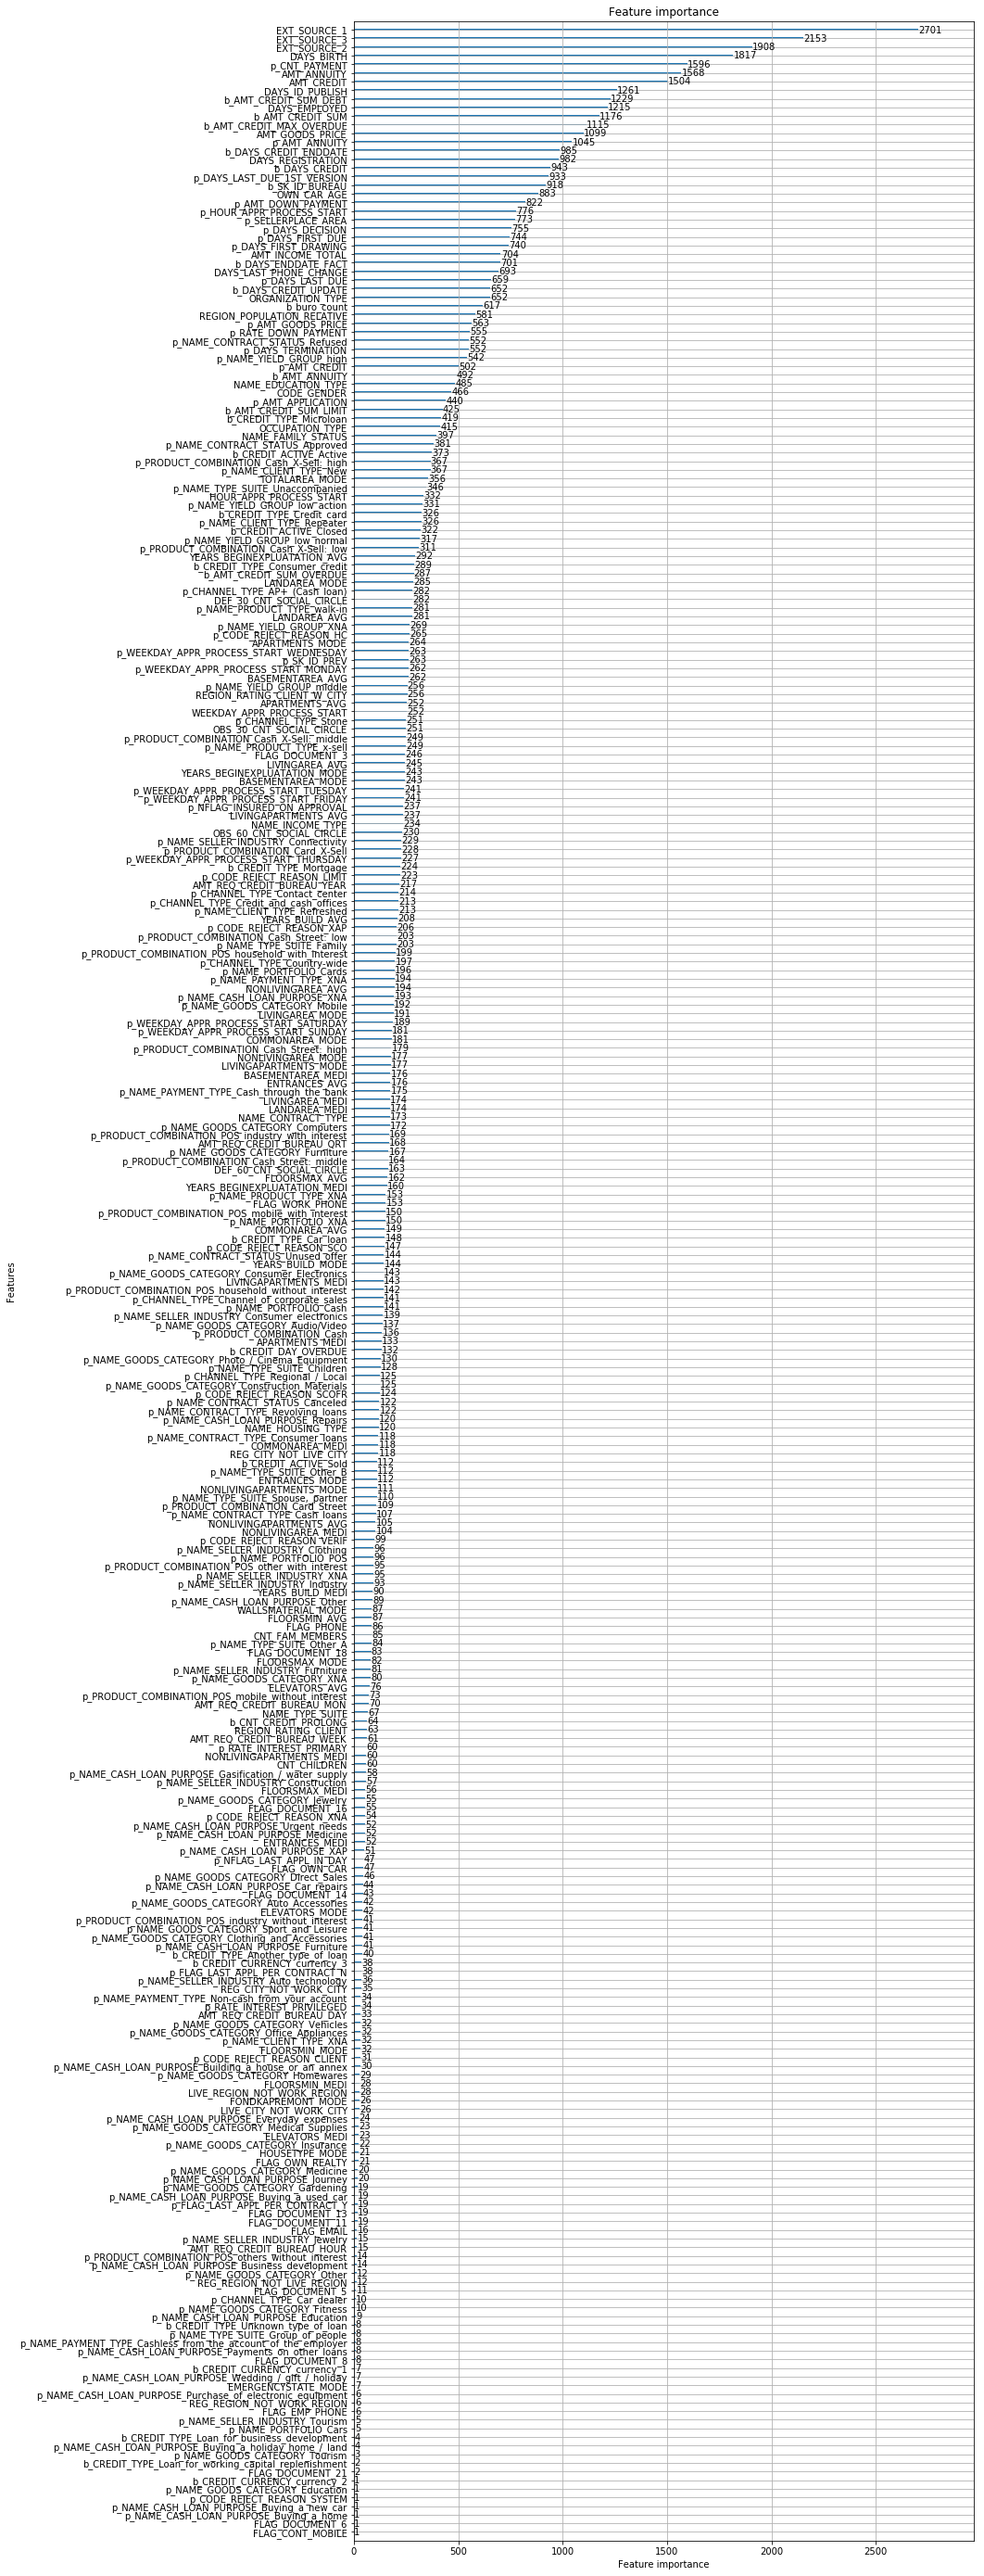

In [61]:
lgb.plot_importance(model, figsize=(12, 50));

In [62]:
preds = model.predict(testX)
sub_lgb = pd.DataFrame()
sub_lgb['SK_ID_CURR'] = test_id
sub_lgb['TARGET'] = preds
sub_lgb.to_csv("lgb_baseline.csv", index=False)
sub_lgb.head()

,SK_ID_CURR,TARGET
0,100001,0.022886
1,100005,0.145682
2,100013,0.013573
3,100028,0.041421
4,100038,0.168263
